In [1]:
from pathlib import Path
import sys
import bz2

import pandas as pd
import orjson

sys.path.append(str(Path('../').resolve()))

from simulation.model import CommunicationNetwork

In [2]:
def load_channels(data_path):
    with open(data_path, 'rb') as file:
        d = orjson.loads(bz2.decompress(file.read()))
    df = pd.DataFrame.from_dict(d, orient='index')
    df.start = pd.to_datetime(df.start)
    df.end = pd.to_datetime(df.end)
    df.bound = df.bound.astype('category')
    return df

In [3]:
communication_networks = {
    'Android': CommunicationNetwork.from_json(Path('../data/networks/android.json.bz2')),
    'Visual Studio Code': CommunicationNetwork.from_json(Path('../data/networks/vscode.json.bz2')),
    'React': CommunicationNetwork.from_json(Path('../data/networks/react.json.bz2')),
    'Microsoft': CommunicationNetwork.from_json(Path('../data/networks/microsoft.json.bz2')),
    'Spotify': CommunicationNetwork.from_json(Path('../data/networks/spotify.json.bz2')),
    'Trivago': CommunicationNetwork.from_json(Path('../data/networks/trivago.json.bz2')), 
}

In [4]:
code_review_tools = {
    'Microsoft': 'CodeFlow',
    'Spotify': 'GitHub', 
    'Trivago': 'BitBucket', 
    'Android': 'Gerrit',
    'Visual Studio Code': 'GitHub',
    'React': 'GitHub',
}
classification = {
    'Microsoft': 'large',
    'Spotify': 'mid-sized', 
    'Trivago': 'small',
    'Android': 'large',
    'Visual Studio Code': 'mid-sized',
    'React': 'small',
}
for name, cn in communication_networks.items():
    num_channels = len(cn.channels())
    num_participants = len(cn.participants())
    print(f'{name} & {classification[name]} & \\num{{{num_channels}}} & \\num{{{num_participants}}} & {code_review_tools[name]} \\\\')

Android & large & \num{10279} & \num{1793} & Gerrit \\
Visual Studio Code & mid-sized & \num{802} & \num{162} & GitHub \\
React & small & \num{229} & \num{64} & GitHub \\
Microsoft & large & \num{309740} & \num{37103} & CodeFlow \\
Spotify & mid-sized & \num{22504} & \num{1730} & GitHub \\
Trivago & small & \num{2442} & \num{364} & BitBucket \\


In [5]:
results = []
for name, cn in communication_networks.items():
    results += [pd.DataFrame([(name, len(cn.channels(participant))) for participant in cn.participants()], columns=['name', 'num_code_reviews'])]
df = pd.concat(results).reset_index(drop=True)
df.sort_values('num_code_reviews', ascending=False).head(14)

,name,num_code_reviews
12051,Microsoft,8249
26945,Microsoft,7691
18639,Microsoft,6684
10664,Microsoft,2040
21794,Microsoft,1056
16723,Microsoft,1008
2193,Microsoft,630
17225,Microsoft,605
27706,Microsoft,592
32990,Microsoft,582


In [6]:
bounds = pd.concat([load_channels(Path(f'../data/networks/{name}.json.bz2')).bound.value_counts(normalize=True).rename(name.capitalize()) for name in ('android', 'vscode', 'react', 'microsoft', 'trivago', 'spotify',)], axis=1)

<Axes: >

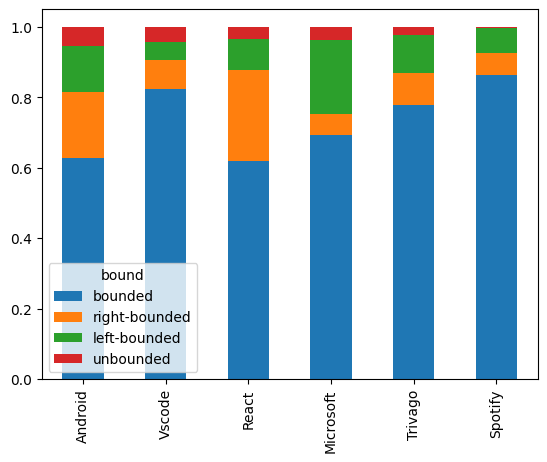

In [7]:
bounds.transpose().plot(kind='bar', stacked=True)

In [8]:
bounds.transpose().to_csv('../reports/csv/bounds.csv', index_label='index', float_format='%g')